# E-Commerce Sales Analytics #

### Data Analytics proyect using Kaggle's dataset 'E-commerce Website Sales Data'###

# Step 0: Import and read data#

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 30)

In [15]:
#Se importa los datos en un dataframe utilizando pandas
data = pd.read_csv('ecomm_sales_data.csv')

# Step 1: Understand the Data #

Using the shape attribute we can see that the data consists of 51,290 rows and 24 columns.

In [13]:
data.shape

(51290, 24)

The head method shows the first five records in the dataset.

In [17]:
data.head()

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
0,26341,CA-2012-124891,31/7/2012,31/7/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,10024.0,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,933.57,762.1845,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,NaN,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,923.63,-288.7650,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,NaN,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,915.49,919.9710,Medium
3,13524,ES-2013-1579342,28/1/2013,30/1/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,NaN,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,910.16,-96.5400,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,NaN,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,903.04,311.5200,Critical


We can also use dtypes attribute to see what are the columns' data properties.

In [18]:
data.dtypes

ROW ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Postal Code       float64
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Shipping Cost     float64
Profit            float64
Order Priority     object
dtype: object

Lastly, we use describe to see basic descriptive statistics of the numerical data.

In [23]:
data.describe()

,ROW ID,Postal Code,Sales,Quantity,Discount,Shipping Cost,Profit
count,51290.000000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.383857,55190.379428,246.490581,3.476545,0.142908,26.375915,28.610982
std,14806.263170,32063.693350,487.565361,2.278766,0.212280,57.296804,174.340972
min,1.000000,1040.000000,0.444000,1.000000,0.000000,0.000000,-6599.978000
25%,12823.250000,23223.000000,30.758625,2.000000,0.000000,2.610000,0.000000
50%,25645.500000,56430.500000,85.053000,3.000000,0.000000,7.790000,9.240000
75%,38467.750000,90008.000000,251.053200,5.000000,0.200000,24.450000,36.810000
max,51290.000000,99301.000000,22638.480000,14.000000,0.850000,933.570000,8399.976000


# Step 2: Data Preparation #

First we change 'Order Date' and 'Ship Date' type from Object to Datetime. This helps manipulate time data easier. 

In [26]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data.dtypes

ROW ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Shipping Cost            float64
Profit                   float64
Order Priority            object
dtype: object

Then we can check for missing values on the dataset. In this case the only missing values come from the Postal Code Column, which doesn´t affect our analysis.

In [28]:
data.isna().sum()

ROW ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Market                0
Postal Code       41296
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Shipping Cost         0
Profit                0
Order Priority        0
dtype: int64

Then we check if there is duplicated data. It seems there are no duplicate records.

In [36]:
data.loc[data.duplicated()]

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority


We can chcek a specific column, in this case 'Order ID'. Here we see there are rows with the same Order ID. Let's see why this is the case.

In [32]:
data.loc[data.duplicated(subset=['Order ID'])]

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
53,30190,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,FUR-BO-10001372,Furniture,Bookcases,"Safco Classic Bookcase, Pine",2197.500,5,0.0,627.27,153.7500,Critical
90,29600,IN-2012-48240,2012-05-25,2012-05-28,Second Class,GP-14740,Guy Phonely,Corporate,Delhi,Delhi,India,APAC,NaN,Central Asia,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",1916.730,3,0.0,548.40,498.3300,Critical
163,30187,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,FUR-TA-10002153,Furniture,Tables,"Lesro Round Table, with Bottom Storage",1356.030,3,0.0,458.97,311.8500,Critical
187,29269,IN-2014-37320,2014-11-11,2014-11-15,Standard Class,BF-11005,Barry Franz,Home Office,Gorakhpur,Haryana,India,APAC,NaN,Central Asia,OFF-AP-10002244,Office Supplies,Appliances,"Breville Refrigerator, White",3622.290,7,0.0,438.89,1267.7700,High
211,10306,ES-2012-2510515,2012-06-19,2012-06-19,Same Day,LH-17155,Logan Haushalter,Consumer,Le Bouscat,Aquitaine,France,EU,NaN,Central,OFF-AP-10002330,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",2443.905,5,0.1,416.33,760.3050,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51282,9922,MX-2012-100258,2012-12-28,2012-12-31,First Class,KM-16375,Katherine Murray,Home Office,Managua,Managua,Nicaragua,LATAM,NaN,Central,OFF-PA-10004020,Office Supplies,Paper,"SanDisk Message Books, 8.5 x 11",18.640,1,0.0,0.01,8.0000,Medium
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,NaN,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,0.01,4.5000,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,0.01,-1.1100,Medium
51287,40470,US-2013-155768,2013-02-12,2013-02-12,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,US,93030.0,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,0.01,11.2308,High


With the query method we can see that the rows belong to each product of the Order, so it makes sense there are duplicate Order IDs.

In [35]:
data.query('`Order ID` == "IN-2011-10286"')

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
26,30191,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,FUR-TA-10004744,Furniture,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,725.57,720.36,Critical
53,30190,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,FUR-BO-10001372,Furniture,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.0,627.27,153.75,Critical
163,30187,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,FUR-TA-10002153,Furniture,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,458.97,311.85,Critical
991,30193,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,FUR-CH-10001913,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,203.92,114.60,Critical
12416,30189,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,TEC-MA-10000964,Technology,Machines,"Okidata Calculator, Red",148.32,3,0.0,25.48,68.22,Critical
16119,30194,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,OFF-BI-10004685,Office Supplies,Binders,"Acco Binder, Economy",45.45,3,0.0,17.73,14.04,Critical
19915,30188,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,OFF-EN-10002757,Office Supplies,Envelopes,"Ames Interoffice Envelope, Security-Tint",95.04,2,0.0,12.59,13.26,Critical
30940,30192,IN-2011-10286,2011-12-17,2011-12-20,First Class,PB-19210,Phillip Breyer,Corporate,Taipei,Taipei City,Taiwan,APAC,NaN,North Asia,OFF-LA-10000635,Office Supplies,Labels,"Harbour Creations Shipping Labels, 5000 Label Set",23.70,2,0.0,5.09,9.48,Critical


# Step 3 Feature Understanding #

In [42]:
data['Product Name'].value_counts()

Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Park Ridge Embossed Executive Business Envelopes                               1
Star Micronics TSP100 TSP143LAN Receipt Printer                                1
Pyle PRT45 Retro Home Telephone                                                1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection      1
Zebra GK420t Direct Thermal/Thermal Transfer Printer                           1
Name: Product Name, Length: 3788, dtype: int64

Text(0, 0.5, 'Count')

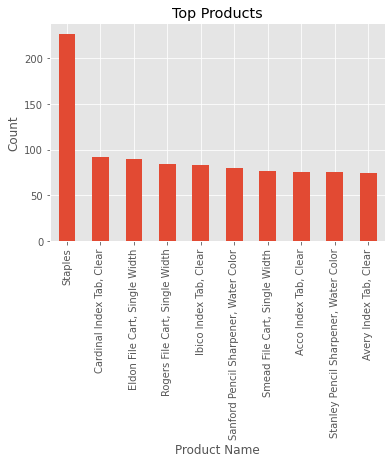

In [46]:
ax = data['Product Name'].value_counts().head(10).plot(kind='bar', title='Top Products')
ax.set_xlabel('Product Name')
ax.set_ylabel('Count')

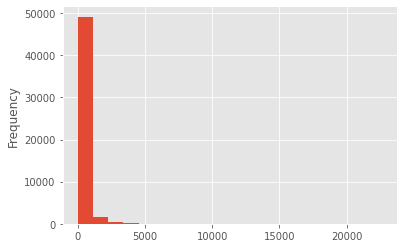

In [51]:
ax = data['Sales'].plot(kind = 'hist', bins=20)

# Step 4: Feature Relationship #

<AxesSubplot:xlabel='Order Date', ylabel='Profit'>

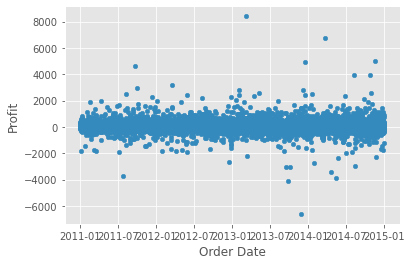

In [52]:
data.plot(kind = 'scatter', x = 'Order Date', y = 'Profit')

<AxesSubplot:xlabel='Order Date'>

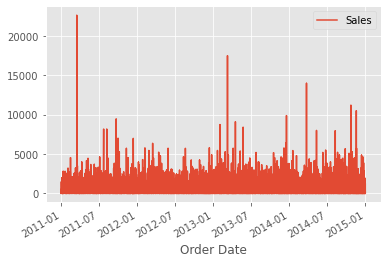

In [53]:
data.plot(kind ='line', x = 'Order Date', y = 'Sales')